In [20]:
## Basically .map() is used between two data frames

import pandas as pd

#SERIEA 2022 IMPORT
df = pd.read_csv(r"C:\Users\Honest\Downloads\Football Analytics\data\SeriaA_2022.csv")

In [21]:
#df[['player_id','mins_played','xG','touches']]
df.fillna(0, inplace=True)

#xG_P100 per TOUCHES
#xG_P90 per GAMES PLAYED
df['xG_P100'] = df['xG']/df['touches']*100
df['xG_P90'] = df['xG']/df['mins_played']*90
dfxg = df[['player_id','xG','xG_P100','xG_P90','mins_played','touches']]
dfxg.head()

,player_id,xG,xG_P100,xG_P90,mins_played,touches
0,193509,0.000000,0.000000,0.000000,2250.0,1059.0
1,431079,0.789332,0.038022,0.023170,3066.0,2076.0
2,161490,0.101700,0.017626,0.010557,867.0,577.0
3,84724,0.111489,0.013936,0.008348,1202.0,800.0
4,156267,1.432522,0.161502,0.093088,1385.0,887.0


In [22]:
#PLAYERS IMPORT
players = pd.read_csv(r"C:\Users\Honest\Downloads\Football Analytics\data\SeriaA_2022_players.csv")

#players.head()

In [23]:
#For each ID a
players.set_index('player_id', inplace=True)
dfxg['edited_name'] = dfxg.player_id.map(players.edited_name)
dfxg.head()

C:\Users\Honest\AppData\Local\Temp\ipykernel_7924\3983481757.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfxg['edited_name'] = dfxg.player_id.map(players.edited_name)


,player_id,xG,xG_P100,xG_P90,mins_played,touches,edited_name
0,193509,0.000000,0.000000,0.000000,2250.0,1059.0,E. Audero
1,431079,0.789332,0.038022,0.023170,3066.0,2076.0,T. Augello
2,161490,0.101700,0.017626,0.010557,867.0,577.0,A. Ferrari
3,84724,0.111489,0.013936,0.008348,1202.0,800.0,B. Bereszynski
4,156267,1.432522,0.161502,0.093088,1385.0,887.0,O. Colley


In [24]:
min_mins_played = 270
dfxg = dfxg[dfxg.mins_played > min_mins_played]
#dfxg.head(10)

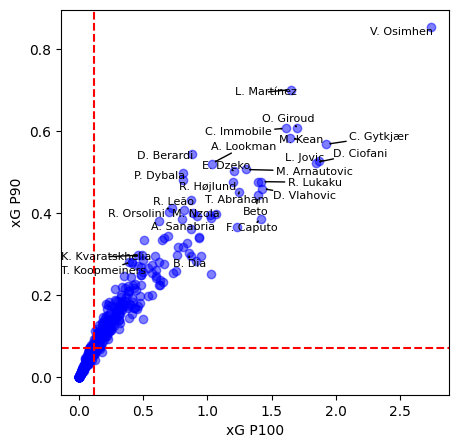

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
from adjustText import adjust_text

x = dfxg['xG_P100']
y = dfxg['xG_P90']

fig, ax = plt.subplots(figsize =(5,5))
fig.patch.set_facecolor('white')
#ax.set_facecolor('white')
#sns.despine(fig = fig, ax = ax, top = True, right = True, left = True, bottom = True)
ax.scatter(x,y, alpha = 0.5, color = 'blue')
ax.set_xlabel('xG P100')
ax.set_ylabel('xG P90')


ax.axvline(x.median(), color = 'red', linestyle ='--')
ax.axhline(y.median(), color = 'red', linestyle ='--')

texts =[]

for i,r in dfxg[(dfxg.xG > 8) | (dfxg.xG_P100 > 1.4)].iterrows():
    #ax.annotate(r.edited_name, (r.xG_P100, r.xG_P90), fontsize  = 8)
    texts.append(ax.annotate(r.edited_name, xy=(r.xG_P100, r.xG_P90), fontsize  = 8))

adjust_text(texts,  arrowprops = dict(arrowstyle = '->', color = 'black'))









In [26]:
dfe = pd.read_csv(r'C:\Users\Honest\Downloads\Football Analytics\data\SeriaA_2022_game_id.csv')

In [27]:
dfe.head()

,id,game_id,event_id,opta_id,competition_id,season,matchday,player_id,team_id,home_team_id,...,x,y,x_value,timestamp,last_modified,threshold,version,Q,created_at,updated_at
0,2501880921,2302638,1,NaN,21,2022,20,-1,120,120,...,0.0,0.0,NaN,2023-01-29 10:26:17,2023-01-29 11:28:00,NaN,1674991679978,"[{""@attributes"": {""id"": ""4001564855"", ""value"":...",2023-01-29 11:26:20,2023-01-29 12:28:04
1,2501881723,2302638,1,NaN,21,2022,20,-1,2182,120,...,0.0,0.0,NaN,2023-01-29 10:28:47,2023-01-29 11:32:44,NaN,1674991964387,"[{""@attributes"": {""id"": ""4001568523"", ""value"":...",2023-01-29 11:28:49,2023-01-29 12:32:50
2,2501905763,2302638,2,NaN,21,2022,20,-1,120,120,...,0.0,0.0,NaN,2023-01-29 11:31:23,2023-01-29 20:58:54,NaN,1675025935733,"[{""@attributes"": {""id"": ""4001691493"", ""value"":...",2023-01-29 12:31:29,2023-01-30 00:32:13
3,2501905781,2302638,2,NaN,21,2022,20,-1,2182,120,...,0.0,0.0,NaN,2023-01-29 11:31:23,2023-01-29 11:31:24,NaN,1674991884708,"[{""@attributes"": {""id"": ""4001691567"", ""value"":...",2023-01-29 12:31:29,2023-01-29 12:31:29
4,2501905801,2302638,3,NaN,21,2022,20,44346,120,120,...,50.2,49.9,NaN,2023-01-29 11:31:23,2023-01-29 21:07:54,NaN,1675026474836,"[{""@attributes"": {""id"": ""4001691691"", ""value"":...",2023-01-29 12:31:29,2023-01-30 00:32:13


In [28]:
events = dfe[['player_id','team_id','type_id','outcome','min','sec','period_id','x','y','Q']].copy()

In [29]:
events.head()

,player_id,team_id,type_id,outcome,min,sec,period_id,x,y,Q
0,-1,120,34,1,0,0,16,0.0,0.0,"[{""@attributes"": {""id"": ""4001564855"", ""value"":..."
1,-1,2182,34,1,0,0,16,0.0,0.0,"[{""@attributes"": {""id"": ""4001568523"", ""value"":..."
2,-1,120,32,1,0,0,1,0.0,0.0,"[{""@attributes"": {""id"": ""4001691493"", ""value"":..."
3,-1,2182,32,1,0,0,1,0.0,0.0,"[{""@attributes"": {""id"": ""4001691567"", ""value"":..."
4,44346,120,1,1,0,0,1,50.2,49.9,"[{""@attributes"": {""id"": ""4001691691"", ""value"":..."


In [30]:
events[(events.type_id == 1) & (events.outcome==1)].groupby('team_id').size()

team_id
120     357
2182    221
dtype: int64

In [31]:
events[(events.type_id == 1) & (events.x > 100 * 2/3)].groupby('team_id').size()

team_id
120     97
2182    54
dtype: int64

In [32]:
#Overall % tilt in final third of a given team

field_tilt_121 = 100 - (97 / (97+54) *100)

print(field_tilt_121)

35.76158940397352


In [33]:
events['player'] = events.player_id.map(players.edited_name)

events.head()

,player_id,team_id,type_id,outcome,min,sec,period_id,x,y,Q,player
0,-1,120,34,1,0,0,16,0.0,0.0,"[{""@attributes"": {""id"": ""4001564855"", ""value"":...",NaN
1,-1,2182,34,1,0,0,16,0.0,0.0,"[{""@attributes"": {""id"": ""4001568523"", ""value"":...",NaN
2,-1,120,32,1,0,0,1,0.0,0.0,"[{""@attributes"": {""id"": ""4001691493"", ""value"":...",NaN
3,-1,2182,32,1,0,0,1,0.0,0.0,"[{""@attributes"": {""id"": ""4001691567"", ""value"":...",NaN
4,44346,120,1,1,0,0,1,50.2,49.9,"[{""@attributes"": {""id"": ""4001691691"", ""value"":...",O. Giroud


In [34]:
events['Q'].iloc[1]

## CHECK CALABRIA ROWS!!!!....value is it a one number or not???

'[{"@attributes": {"id": "4001568523", "value": "1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0", "qualifier_id": "131"}}, {"@attributes": {"id": "4001568519", "value": "47, 6, 3, 14, 28, 44, 10, 16, 92, 23, 45, 7, 8, 11, 13, 15, 25, 27, 35, 42, 64, 77", "qualifier_id": "59"}}, {"@attributes": {"id": "4001568521", "value": "8", "qualifier_id": "130"}}, {"@attributes": {"id": "4001568527", "value": "0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0", "qualifier_id": "227"}}, {"@attributes": {"id": "4001683305", "value": "11941", "qualifier_id": "197"}}, {"@attributes": {"id": "4001568515", "value": "18500, 218441, 201333, 59779, 204631, 441451, 116796, 235453, 95215, 424044, 449431, 440730, 234506, 514449, 155620, 455685, 7485, 213965, 588251, 445043, 450015, 106247", "qualifier_id": "30"}}, {"@attributes": {"id": "4001568525", "value": "18500", "qualifier_id": "194"}}, {"@attributes": {"id": "4001568517", "value": "1, 2, 2, 3, 2, 2, 3, 3, 4, 3, 3, 5, 

In [53]:
## THIS WILL ALSO DISPLAY VALUES INSTEAD OF ONLY DIVIDING T or F
events[events.player=='D. Calabria']

,player_id,team_id,type_id,outcome,min,sec,period_id,x,y,Q,player
10,161918,120,10,1,0,13,1,9.7,29.5,"[{""@attributes"": {""id"": ""4003622051"", ""qualifi...",D. Calabria
12,161918,120,5,0,0,17,1,19.2,-1.5,"[{""@attributes"": {""id"": ""4001692337"", ""value"":...",D. Calabria
16,161918,120,55,1,0,32,1,9.3,4.3,NaN,D. Calabria
21,161918,120,2,1,1,9,1,43.1,2.3,"[{""@attributes"": {""id"": ""4001695131"", ""value"":...",D. Calabria
51,161918,120,1,0,4,33,1,79.4,0.0,"[{""@attributes"": {""id"": ""4001705017"", ""qualifi...",D. Calabria
...,...,...,...,...,...,...,...,...,...,...,...
1524,161918,120,67,1,40,59,1,11.9,37.2,"[{""@attributes"": {""id"": ""4003705567"", ""value"":...",D. Calabria
1533,161918,120,67,0,83,25,2,65.9,7.9,"[{""@attributes"": {""id"": ""4003728959"", ""value"":...",D. Calabria
1536,161918,120,83,1,85,28,2,57.9,10.2,"[{""@attributes"": {""id"": ""4003733651"", ""value"":...",D. Calabria
1544,161918,120,67,1,93,29,2,71.7,59.4,"[{""@attributes"": {""id"": ""4003751607"", ""value"":...",D. Calabria


In [57]:
events[events.player=='D. Calabria'] ["Q"].iloc[1]



'[{"@attributes": {"id": "4001692337", "value": "Back", "qualifier_id": "56"}}, {"@attributes": {"id": "4001692339", "qualifier_id": "347"}}, {"@attributes": {"id": "4001692991", "value": "8", "qualifier_id": "233"}}]'

In [35]:
import numpy as np
def eval_q(x):
    return eval(x.replace("null", "None"))
def get_numeric_q(x, qid):
    for l in x:
        if l['@attributes']['qualifier_id'] == str(qid):
            return float(l['@attributes']['value'])
def get_binary_q(x,qid):
    bl=[]
    for l in x:
        if l['@attributes']['qualifier_id'] == str(qid):
            bl.append(True)
        else:
            bl.append(False)
    bl = np.asarray(bl)
    if bl.any():
        return True
    else:
        return False

In [36]:
passes = events[(events.type_id == 1) & (events.player == 'D. Calabria')].copy()
passes['Q'] = passes.Q.apply(eval_q)
passes['end_x'] = passes.Q.apply(get_numeric_q, qid = 140)
passes['end_y'] = passes.Q.apply(get_numeric_q, qid = 141)

passes.head()

,player_id,team_id,type_id,outcome,min,sec,period_id,x,y,Q,player,end_x,end_y
51,161918,120,1,0,4,33,1,79.4,0.0,"[{'@attributes': {'id': '4001705017', 'qualifi...",D. Calabria,88.3,30.9
90,161918,120,1,1,6,11,1,52.7,9.1,"[{'@attributes': {'id': '4001710645', 'value':...",D. Calabria,26.6,21.6
96,161918,120,1,1,6,36,1,45.4,2.3,"[{'@attributes': {'id': '4001711667', 'value':...",D. Calabria,55.7,13.8
99,161918,120,1,1,6,41,1,51.4,16.2,"[{'@attributes': {'id': '4001712057', 'value':...",D. Calabria,56.5,22.8
203,161918,120,1,1,14,50,1,65.6,6.4,"[{'@attributes': {'id': '4001737863', 'value':...",D. Calabria,92.4,12.9


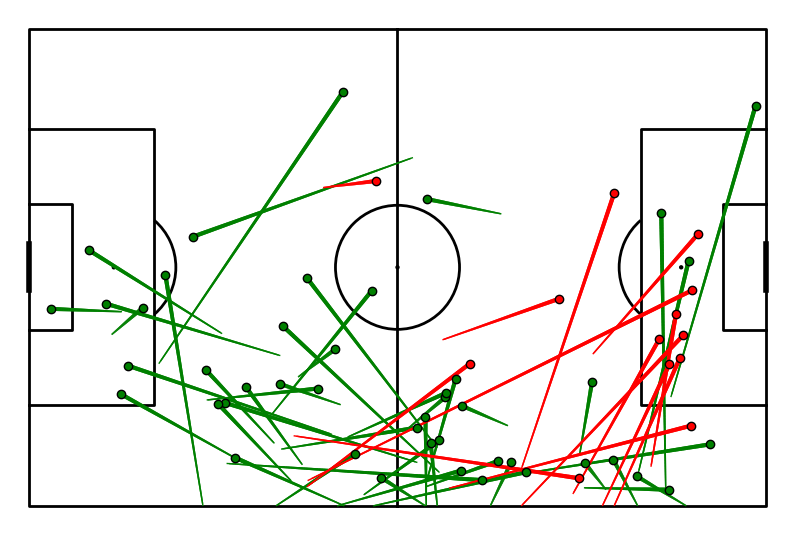

In [37]:
from mplsoccer import Pitch

fig, ax = plt.subplots( figsize=(10,10))
pitch = Pitch(pitch_type = 'opta', line_zorder = 2, line_color = 'black')
pitch.draw(ax = ax)
ax.scatter(passes[passes.outcome == 1].end_x, passes[passes.outcome == 1].end_y, color = 'green', edgecolor = 'black', zorder = 3)
ax.scatter(passes[passes.outcome == 0].end_x, passes[passes.outcome == 0].end_y, color = 'red', edgecolor = 'black', zorder = 3)

sp = passes[passes.outcome == 1]
up  = passes[passes.outcome == 0]

pitch.lines(sp.x,sp.y,sp.end_x,sp.end_y,comet = True,ax = ax, color = 'green', zorder = 2,
            lw = 3,
            alpha_start = 0.05,
            alpha_end = 0.75)

pitch.lines(up.x,up.y,up.end_x,up.end_y,comet = True,ax = ax, color = 'red', zorder = 2,lw = 3,
            alpha_start = 0.05,
            alpha_end = 0.75)

